Phase 1: Data Preparation & Feature Engineering

Step 1: Load and Explore the Dataset
Objective: Read the dataset, understand its structure, and do an initial check.

In [2]:
import pandas as pd

# Load CSV, skipping the first 3 metadata lines
df = pd.read_csv('./air.csv', skiprows=3)

# Check structure
df.info()

# Preview first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1164 non-null   object 
 1   min     1164 non-null   float64
 2   max     1164 non-null   float64
 3   median  1164 non-null   float64
 4   q1      1164 non-null   float64
 5   q3      1164 non-null   float64
 6   stdev   1164 non-null   float64
 7   count   1164 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 72.9+ KB


,date,min,max,median,q1,q3,stdev,count
0,2021-09-07T00:00:00.000Z,12.9,187.0,62.5,34.40,112.30,42.909,303
1,2021-09-08T00:00:00.000Z,13.2,56.6,31.7,24.65,40.95,10.191,593
2,2021-09-09T00:00:00.000Z,8.4,91.9,34.7,27.00,44.20,13.401,511
3,2021-09-10T00:00:00.000Z,21.6,359.5,59.2,43.50,105.70,66.902,585
4,2021-09-11T00:00:00.000Z,21.7,130.1,46.8,40.54,62.35,20.834,565


Step 3: Data Cleaning


1.Convert the date column to datetime format.

2.Set date as the index.

3.Sort by date.

4.Plot for visual inspection.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.

Missing values:
 min       0
max       0
median    0
q1        0
q3        0
stdev     0
count     0
dtype: int64



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


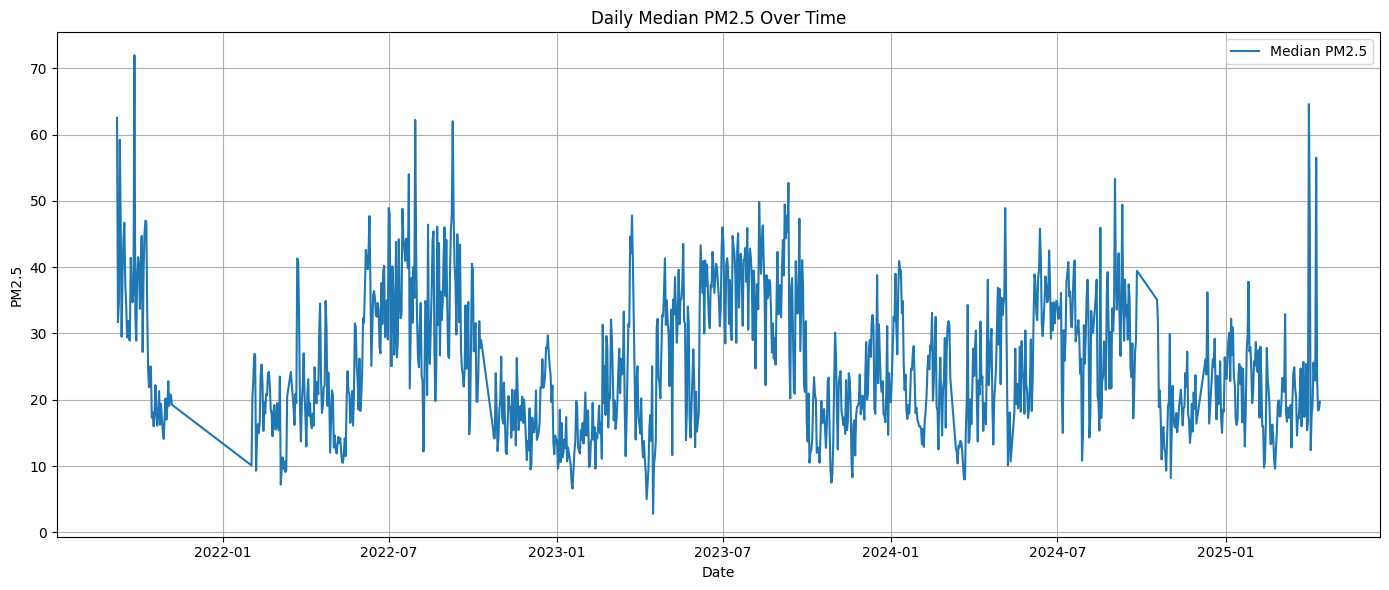

In [9]:
%pip install matplotlib
import matplotlib.pyplot as plt

# The DataFrame already has a DatetimeIndex and is sorted

# Quick null check
print("\nMissing values:\n", df.isnull().sum())

# Plot median PM2.5 over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['median'], label='Median PM2.5')
plt.title('Daily Median PM2.5 Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Step 4: Exploratory Data Analysis (EDA)


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


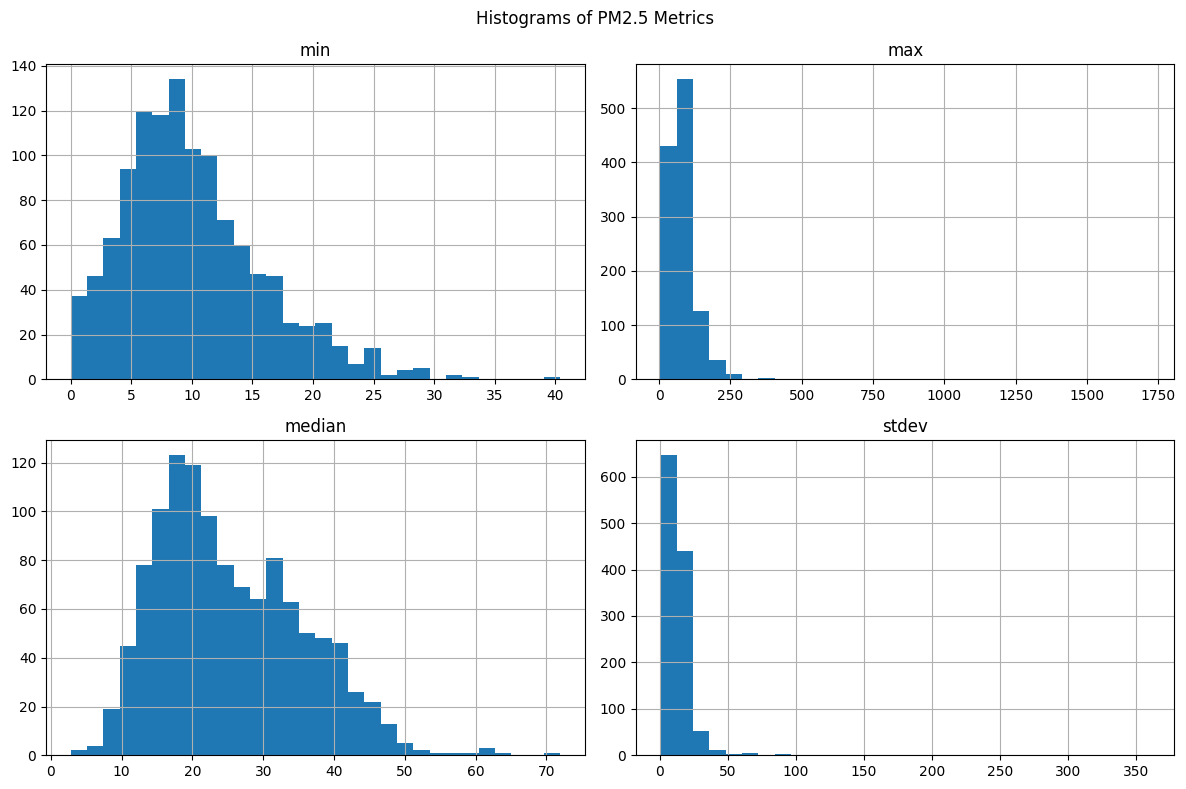

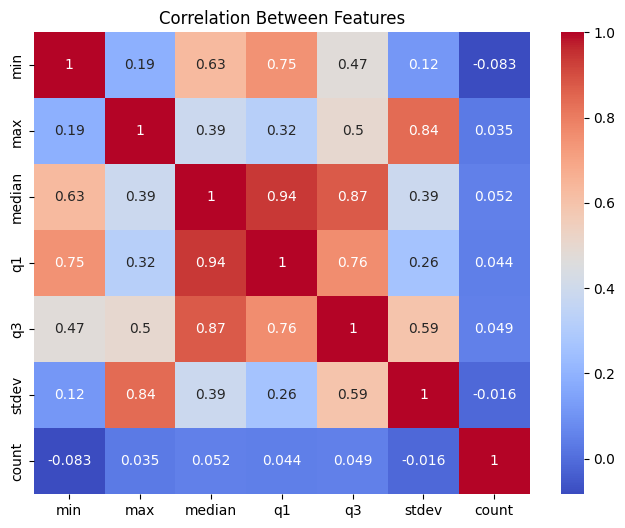

In [14]:
%pip install seaborn
import seaborn as sns

# Histograms of pollution metrics
df[['min', 'max', 'median', 'stdev']].hist(bins=30, figsize=(12, 8), layout=(2, 2))
plt.suptitle("Histograms of PM2.5 Metrics")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()



 Feature Engineering

Lag Features: To incorporate the temporal nature of air quality data, we can create lag features. These are past values of a variable, which can be useful for predicting future values.


In [16]:
# Create lag features for 'median' PM2.5
df['median_lag1'] = df['median'].shift(1)
df['median_lag7'] = df['median'].shift(7)
df['median_lag30'] = df['median'].shift(30)

# Create lag features for other columns as well
df['min_lag1'] = df['min'].shift(1)
df['max_lag1'] = df['max'].shift(1)
df['stdev_lag1'] = df['stdev'].shift(1)

df.dropna(inplace=True)  # Remove rows with NaN due to lag
print(df.head())

                            min   max  median    q1     q3   stdev  count  \
date                                                                        
2021-11-06 00:00:00+00:00  11.4  77.7   19.25  14.9  26.70  10.478    542   
2022-02-01 00:00:00+00:00   3.3  36.1   10.10   5.8  13.60   5.672    291   
2022-02-02 00:00:00+00:00   6.4  94.3   20.39  13.1  30.65  17.479    464   
2022-02-03 00:00:00+00:00   4.6  90.2   22.95  13.1  36.60  19.342    490   
2022-02-04 00:00:00+00:00   6.4  90.9   26.90  12.3  43.00  18.495    439   

                           median_lag1  median_lag7  median_lag30  min_lag1  \
date                                                                          
2021-11-06 00:00:00+00:00        20.70         20.2         44.95       9.2   
2022-02-01 00:00:00+00:00        19.25         17.0         47.00      11.4   
2022-02-02 00:00:00+00:00        10.10         18.8         46.90       3.3   
2022-02-03 00:00:00+00:00        20.39         22.8         33.10

Rolling Statistics: Calculate rolling statistics (e.g., rolling mean, rolling standard deviation) to smooth out noise and identify trends.

In [17]:
# Calculate rolling mean and standard deviation
df['median_rolling_mean_7'] = df['median'].rolling(window=7).mean()
df['median_rolling_std_7'] = df['median'].rolling(window=7).std()

df['median_rolling_mean_30'] = df['median'].rolling(window=30).mean()
df['median_rolling_std_30'] = df['median'].rolling(window=30).std()

df.dropna(inplace=True)  # Remove rows with NaN due to rolling stats
print(df.head())

                            min    max  median    q1     q3   stdev  count  \
date                                                                         
2022-03-01 00:00:00+00:00   8.9   38.6    19.5  15.2  24.20   6.154    532   
2022-03-02 00:00:00+00:00   7.0   53.0    16.1  11.6  31.65  11.422    417   
2022-03-03 00:00:00+00:00   8.1  157.4    15.4  11.1  32.10  19.269    561   
2022-03-04 00:00:00+00:00  14.2  100.7    23.5  18.4  45.85  20.344    244   
2022-03-05 00:00:00+00:00   2.5   16.5     7.2   5.2  10.70   3.402    223   

                           median_lag1  median_lag7  median_lag30  min_lag1  \
date                                                                          
2022-03-01 00:00:00+00:00         15.6         18.6         20.70       4.5   
2022-03-02 00:00:00+00:00         19.5         17.8         19.25       8.9   
2022-03-03 00:00:00+00:00         16.1         14.5         10.10       7.0   
2022-03-04 00:00:00+00:00         15.4         18.2       

Datetime Features: Extract datetime components that might be relevant (e.g., day of week, month of year).

In [18]:
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['quarter'] = df.index.quarter

print(df.head())

                            min    max  median    q1     q3   stdev  count  \
date                                                                         
2022-03-01 00:00:00+00:00   8.9   38.6    19.5  15.2  24.20   6.154    532   
2022-03-02 00:00:00+00:00   7.0   53.0    16.1  11.6  31.65  11.422    417   
2022-03-03 00:00:00+00:00   8.1  157.4    15.4  11.1  32.10  19.269    561   
2022-03-04 00:00:00+00:00  14.2  100.7    23.5  18.4  45.85  20.344    244   
2022-03-05 00:00:00+00:00   2.5   16.5     7.2   5.2  10.70   3.402    223   

                           median_lag1  median_lag7  median_lag30  min_lag1  \
date                                                                          
2022-03-01 00:00:00+00:00         15.6         18.6         20.70       4.5   
2022-03-02 00:00:00+00:00         19.5         17.8         19.25       8.9   
2022-03-03 00:00:00+00:00         16.1         14.5         10.10       7.0   
2022-03-04 00:00:00+00:00         15.4         18.2       

Data Transformation

Normalization/Scaling: Machine learning models often perform better when features are on a similar scale.

In [22]:

from sklearn.preprocessing import StandardScaler

numerical_features = ['min', 'max', 'median', 'stdev', 'median_lag1', 'median_lag7', 'median_lag30', 'median_rolling_mean_7', 'median_rolling_std_7', 'median_rolling_mean_30', 'median_rolling_std_30']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())

                                min       max    median    q1     q3  \
date                                                                   
2022-03-01 00:00:00+00:00 -0.183515 -0.578737 -0.574662  15.2  24.20   
2022-03-02 00:00:00+00:00 -0.510933 -0.399575 -0.913578  11.6  31.65   
2022-03-03 00:00:00+00:00 -0.321375  0.899349 -0.983355  11.1  32.10   
2022-03-04 00:00:00+00:00  0.729810  0.193899 -0.175938  18.4  45.85   
2022-03-05 00:00:00+00:00 -1.286397 -0.853701 -1.800740   5.2  10.70   

                              stdev  count  median_lag1  median_lag7  \
date                                                                   
2022-03-01 00:00:00+00:00 -0.552231    532    -0.962760    -0.660446   
2022-03-02 00:00:00+00:00 -0.175806    417    -0.574116    -0.740423   
2022-03-03 00:00:00+00:00  0.384903    561    -0.912934    -1.070325   
2022-03-04 00:00:00+00:00  0.461717    244    -0.982691    -0.700434   
2022-03-05 00:00:00+00:00 -0.748876    223    -0.175507    -0.6

Phase 2: Model Exploration
1. Model Selection

  RF, SVM, XGBoost: These are powerful algorithms good at capturing non-linear relationships. They are often a good starting point for tabular data.
  
  LSTM: This is a recurrent neural network (RNN) architecture well-suited for time series data, as it can learn temporal dependencies.

   
   2.Model Training
   
   Data Splitting: Split the data into training and testing sets.

In [24]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train = train.drop('median', axis=1)
y_train = train['median']
X_test = test.drop('median', axis=1)
y_test = test['median']

Model Training and Cross-Validation:


In [25]:
# Define the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Define the model
model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)




Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


LSTM Model Training:


In [33]:
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np # Import numpy

# Prepare data for LSTM (3D tensor)
def create_dataset(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_lstm, y_train_lstm = create_dataset(X_train, y_train, time_steps=10)
X_test_lstm, y_test_lstm = create_dataset(X_test, y_test, time_steps=10)

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, verbose=1)

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.72.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/20


C:\Users\try\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4811
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9293
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9380
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8032
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6963
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6263
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5795
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5940
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5415
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5035
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4703
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4617
Epoch 13/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4313
Epoch 14/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4440
Epoch 15/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4241
Epoch 16/20
27/27 ━━━━━━━━━━━

 Model Evaluation

Evaluation Metrics: Calculate MAE, RMSE, and R² to evaluate the models.


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate Random Forest model
y_pred_rf = best_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

# Evaluate LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

print("\nLSTM Metrics:")
print(f"MAE: {mae_lstm}, RMSE: {rmse_lstm}, R²: {r2_lstm}")

Random Forest Metrics:
MAE: 0.18059202714287864, RMSE: 0.3174026635415839, R²: 0.8605930956499708
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

LSTM Metrics:
MAE: 0.5809781066200294, RMSE: 0.8003778025211229, R²: 0.08983593158896575



Visualizations:


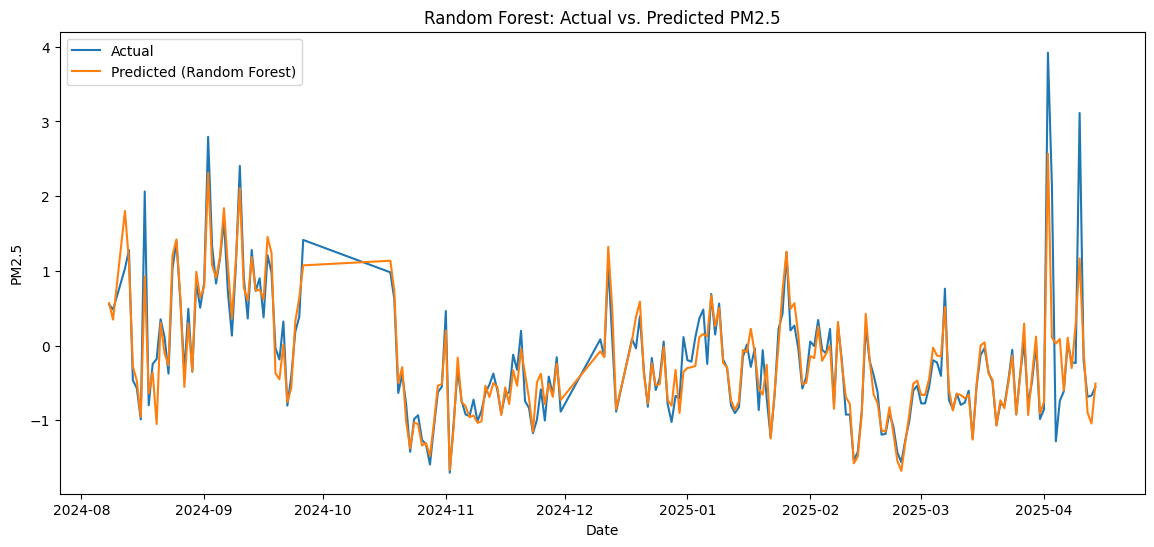

In [36]:
# Plot predictions vs. actual values (Random Forest)
plt.figure(figsize=(14, 6))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred_rf, label='Predicted (Random Forest)')
plt.title('Random Forest: Actual vs. Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

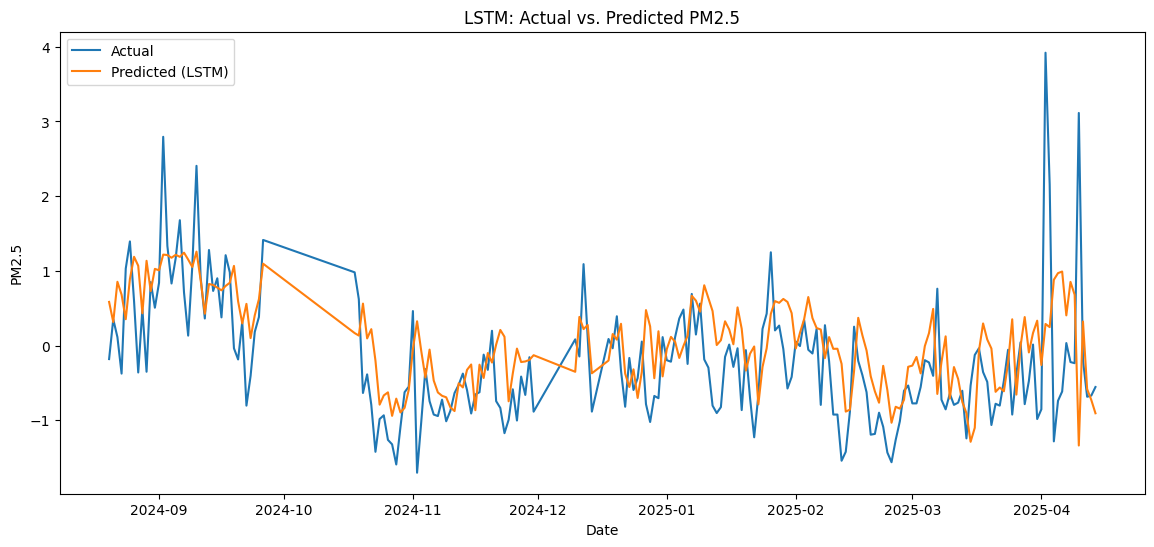

In [37]:
# Plot predictions vs. actual values (LSTM)
plt.figure(figsize=(14, 6))
# Use the index from the LSTM data (X_test_lstm), which is shorter due to time_steps
plt.plot(test.index[10:], y_test_lstm, label='Actual') # Select the relevant part of the original index for plotting
plt.plot(test.index[10:], y_pred_lstm, label='Predicted (LSTM)')
plt.title('LSTM: Actual vs. Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

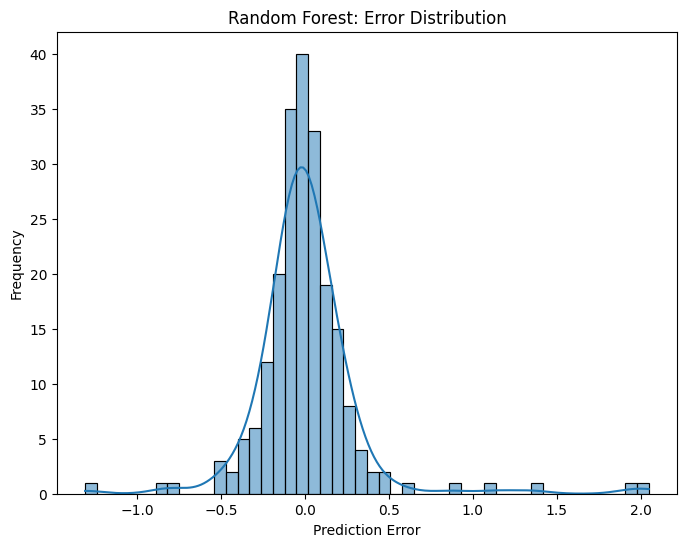

In [38]:
# Plot error distribution (Random Forest)
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred_rf, kde=True)
plt.title('Random Forest: Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

C:\Users\try\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


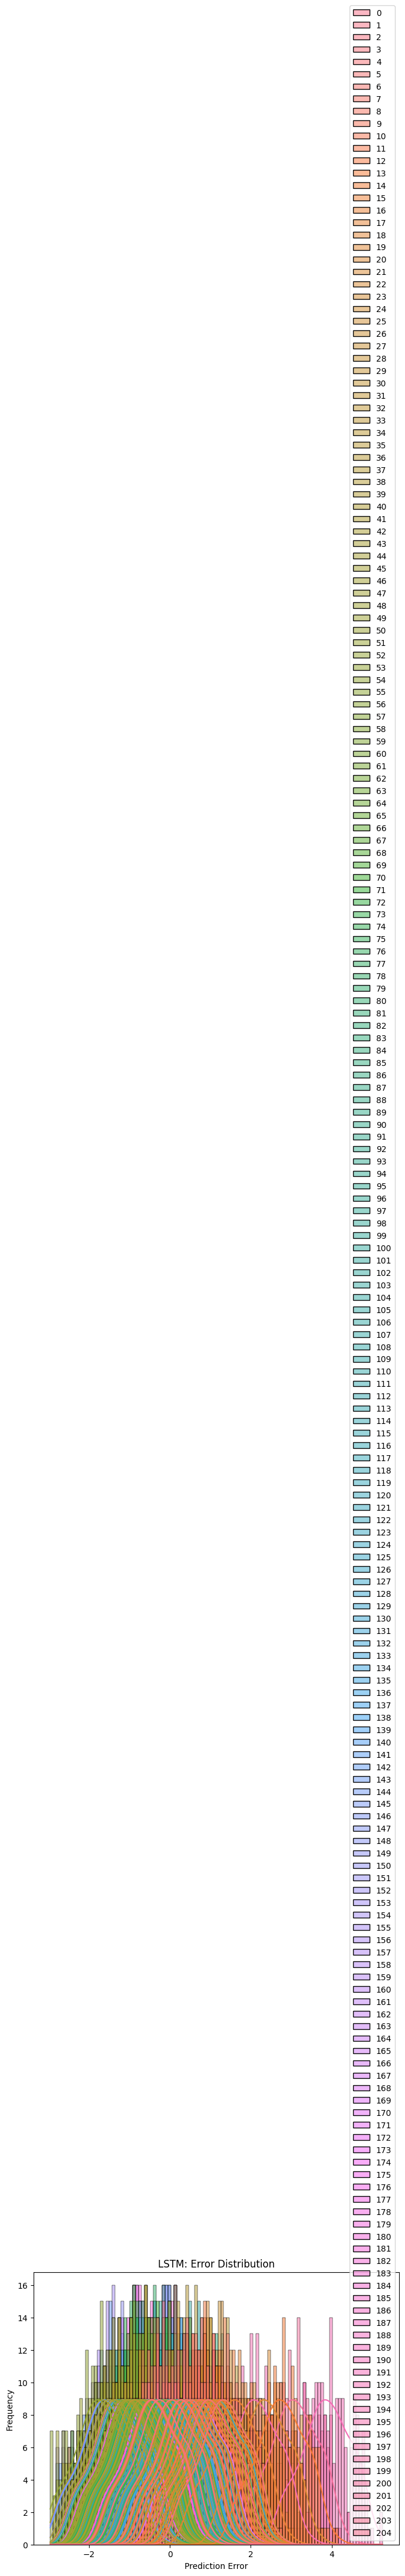

In [41]:
# Plot error distribution (LSTM)
plt.figure(figsize=(8, 6))
sns.histplot(y_test_lstm - y_pred_lstm, kde=True)
plt.title('LSTM: Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

additional Exploratory Data Analysis (EDA) visualizations

1. Time Series Plots of Individual Pollutants

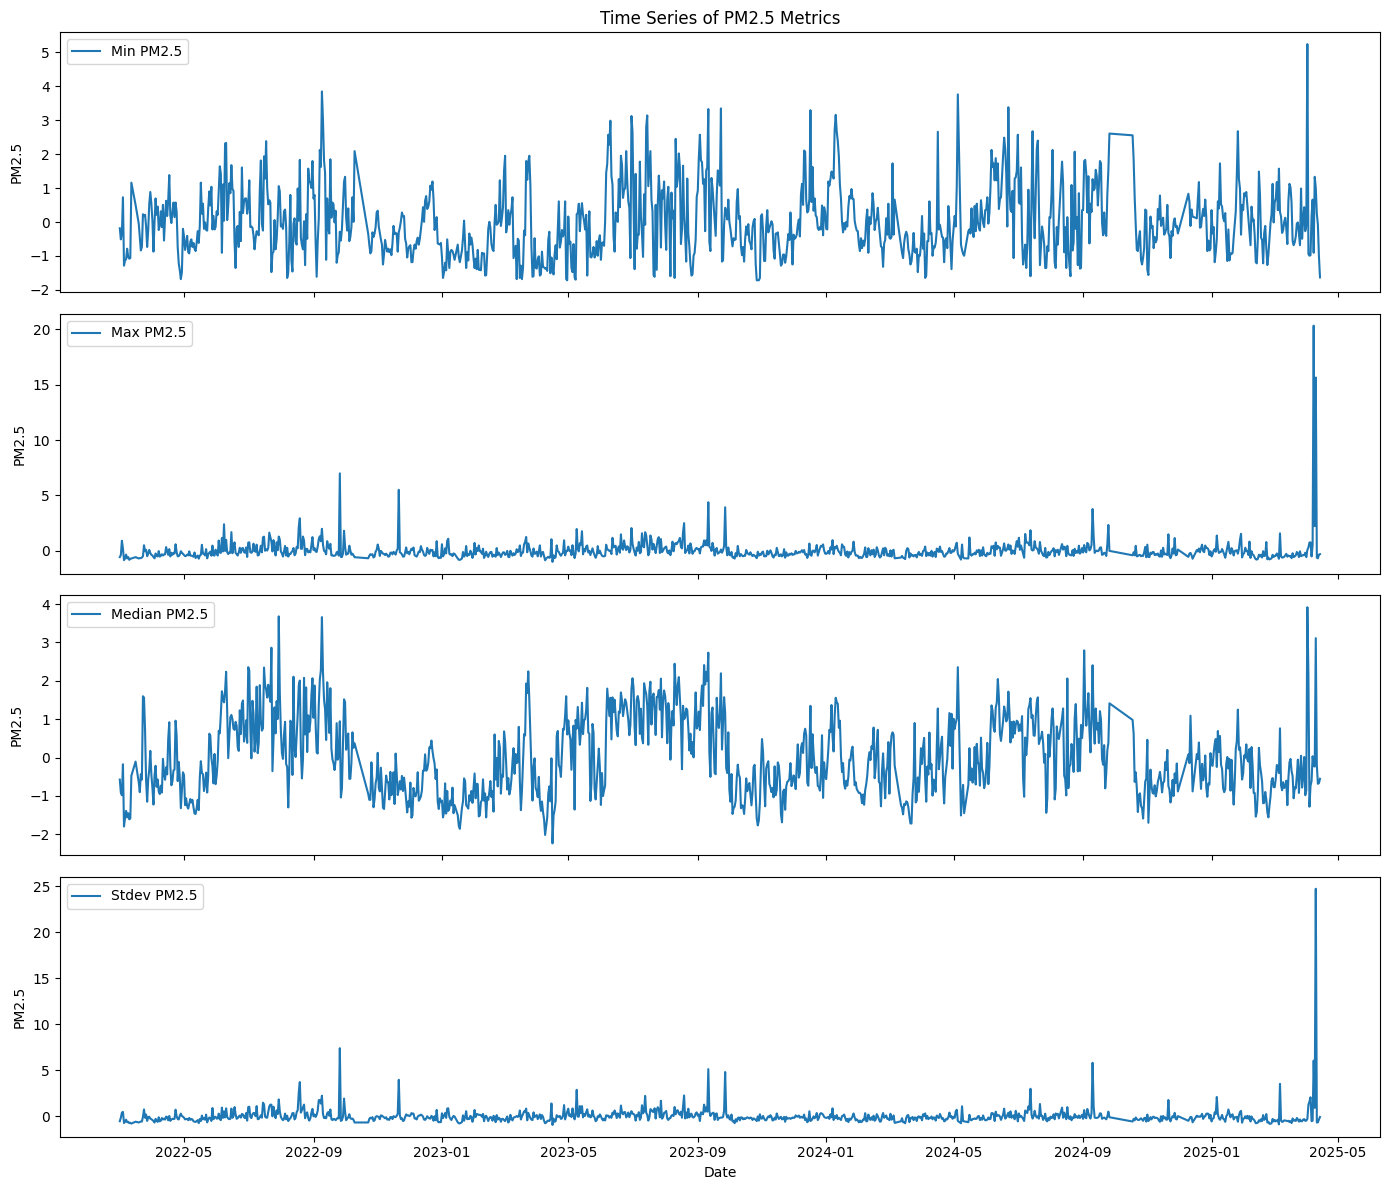

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns # Removed extra spaces before import


# Create subplots for each pollutant
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)


# Plot time series for each pollutant
sns.lineplot(ax=axes[0], x=df.index, y=df['min'], label='Min PM2.5')
sns.lineplot(ax=axes[1], x=df.index, y=df['max'], label='Max PM2.5')
sns.lineplot(ax=axes[2], x=df.index, y=df['median'], label='Median PM2.5')
sns.lineplot(ax=axes[3], x=df.index, y=df['stdev'], label='Stdev PM2.5')


# Customize plots
axes[0].set_ylabel('PM2.5')
axes[1].set_ylabel('PM2.5')
axes[2].set_ylabel('PM2.5')
axes[3].set_ylabel('PM2.5')


axes[0].set_title('Time Series of PM2.5 Metrics')
axes[3].set_xlabel('Date')


plt.tight_layout()
plt.show()

2. Distributions of Pollutants (Histograms, Box Plots)

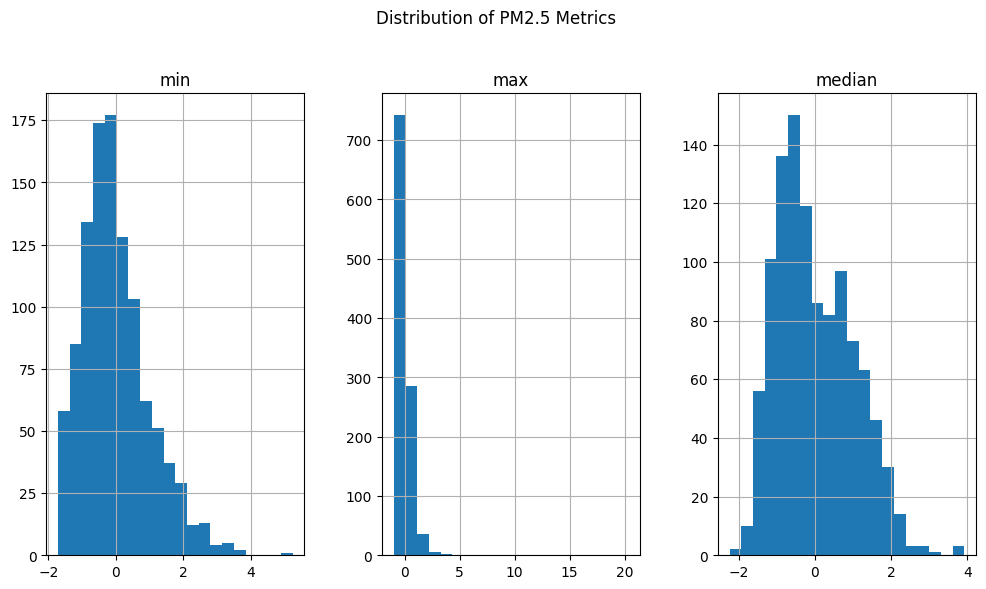

In [43]:
# Histograms
df[['min', 'max', 'median']].hist(bins=20, figsize=(12, 6), layout=(1, 3)) # Removed the extra space at the beginning of this line
plt.suptitle('Distribution of PM2.5 Metrics', y=1.02)
plt.show()




<Figure size 800x600 with 0 Axes>

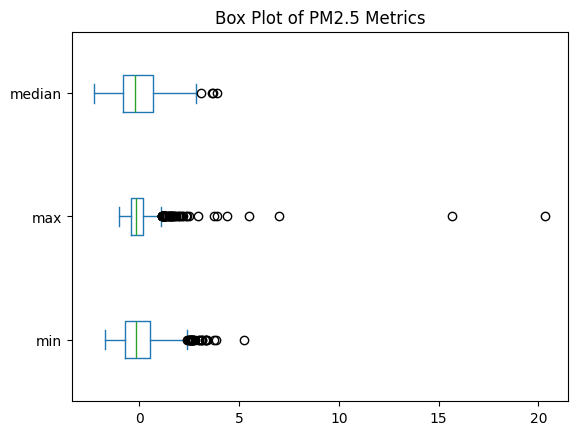

In [44]:
# Box Plots
plt.figure(figsize=(8, 6))
df[['min', 'max', 'median']].plot(kind='box', vert=False)
plt.title('Box Plot of PM2.5 Metrics')
plt.show()